In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading data And Preprocess Them

In [2]:
df = pd.read_csv("home_cost.csv")
df.head(20)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


In [3]:
df.dropna(inplace=True)
df.drop_duplicates()
df = df.sort_values(by='Address')
cnter = 0
str = ' '
###############################################
for i in df.index:

    try:
        df.astype({'Area': 'float64'})
    except ValueError:
        df.drop(i, inplace = True)
        continue
###############################################
#    if float(df.loc[i,'Area']) > 400 :
#        print(df.loc[i,'Area'])
#        df.drop(i, inplace = True )
#        continue
############################################### 
    if df.loc[i,'Parking']:
        df.loc[i,'Parking'] = 1
    else:   
        df.loc[i,'Parking'] = 0
        #print(i)
###############################################
    if df.loc[i,'Address'] != str:
        cnter = cnter +1
        str =  df.loc[i,'Address']
        df.loc[i,'Address'] = cnter
    else:   
        df.loc[i,'Address'] = cnter
###############################################
    if df.loc[i,'Warehouse'] :
        df.loc[i,'Warehouse'] = 1
    else:    
        df.loc[i,'Warehouse'] = 0
###############################################
    if df.loc[i,'Elevator'] :
        df.loc[i,'Elevator'] = 1
    else:    
        df.loc[i,'Elevator'] = 0
###############################################
#    if float(df.loc[i,'Area']) > 1000 :
#        print(df.loc[i,'Area'])
#        df.drop(i, inplace = True )  
###############################################

df.head(20)


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
2928,96,3,1,0,1,1,1.145000e+09,38166.67
2314,220,4,1,1,0,1,7.500000e+09,250000.00
3249,127,2,1,1,1,1,2.500000e+09,83333.33
2645,60,1,1,1,0,1,6.000000e+08,20000.00
127,85,2,1,1,1,1,1.419000e+09,47300.00
2150,44,1,0,1,0,1,5.700000e+08,19000.00
3455,80,2,0,1,1,1,4.100000e+08,13666.67
2102,50,1,1,1,0,1,5.000000e+08,16666.67
87,140,1,0,0,0,1,5.800000e+08,19333.33
2985,102,2,1,1,1,1,1.225000e+09,40833.33


In [4]:
df = df.apply(pd.to_numeric)
df['Area'] = df['Area'].astype(float)
df['Room'] = df['Room'].astype(float)
df.dtypes

Area          float64
Room          float64
Parking         int64
Warehouse       int64
Elevator        int64
Address         int64
Price         float64
Price(USD)    float64
dtype: object

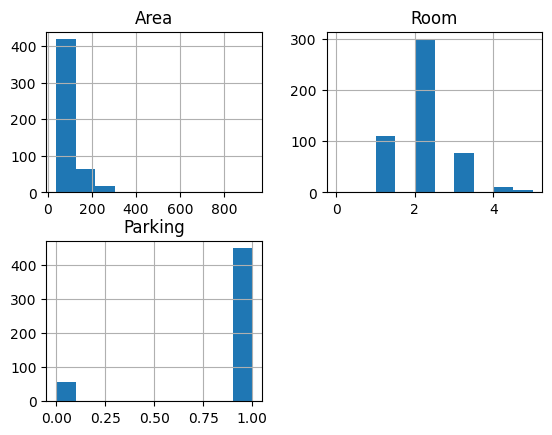

In [5]:
viz = df[['Area','Room','Parking']]
viz.hist()
plt.show()

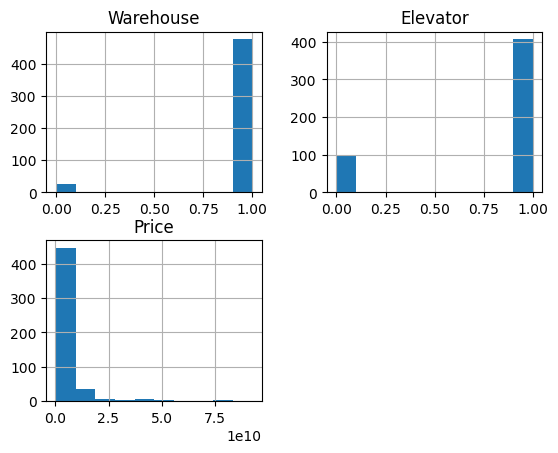

In [6]:
viz = df[['Warehouse','Elevator','Price']]
viz.hist()
plt.show()

In [7]:
df.describe()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02,5.030000e+02
mean,100.387674,1.998012,0.890656,0.946322,0.809145,19.129225,5.674481e+09,1.891494e+05
std,71.932425,0.742825,0.312381,0.225605,0.393366,10.482636,9.420771e+09,3.140257e+05
min,37.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.100000e+08,1.366667e+04
25%,65.000000,2.000000,1.000000,1.000000,1.000000,7.000000,2.050000e+09,6.833333e+04
50%,85.000000,2.000000,1.000000,1.000000,1.000000,23.000000,3.000000e+09,1.000000e+05
75%,110.000000,2.000000,1.000000,1.000000,1.000000,27.000000,5.000000e+09,1.666667e+05
max,929.000000,5.000000,1.000000,1.000000,1.000000,35.000000,9.240000e+10,3.080000e+06


In [8]:
cdf = df[['Area','Room','Parking','Warehouse','Elevator','Address','Price']]
cdf.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
2928,96.0,3.0,1,0,1,1,1.145000e+09
2314,220.0,4.0,1,1,0,1,7.500000e+09
3249,127.0,2.0,1,1,1,1,2.500000e+09
2645,60.0,1.0,1,1,0,1,6.000000e+08
127,85.0,2.0,1,1,1,1,1.419000e+09


# Because we do not have enough data about the houses without warehouse , it is better to ignore it

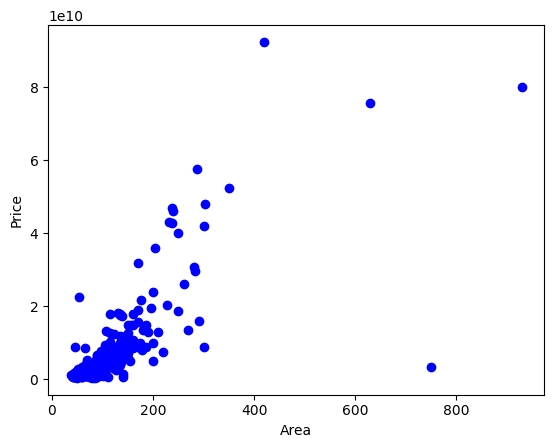

pandas.core.frame.DataFrame

In [9]:
plt.scatter(cdf.Area,cdf.Price, color= 'blue')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()
type(cdf)

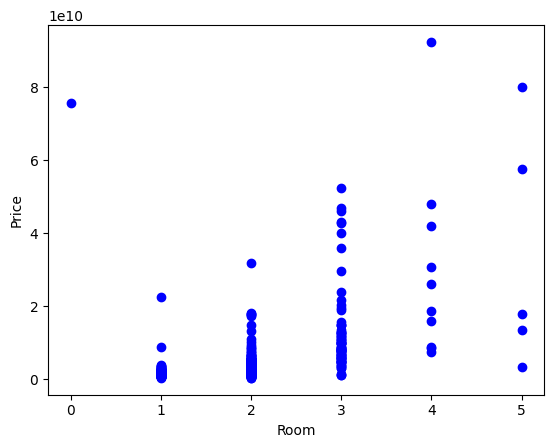

In [10]:
plt.scatter(cdf.Room,cdf.Price, color= 'blue')
plt.xlabel("Room")
plt.ylabel("Price")
plt.show()

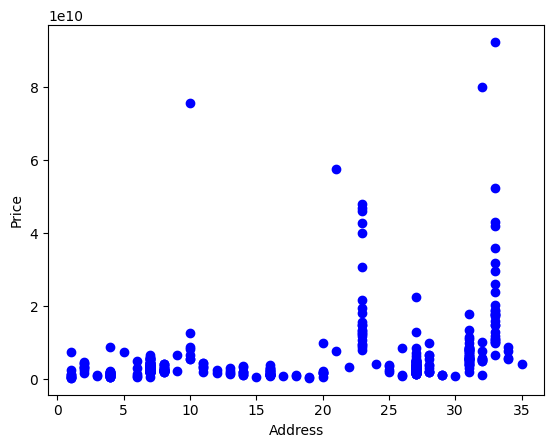

In [11]:
plt.scatter(cdf.Address,cdf.Price, color= 'blue')
plt.xlabel("Address")
plt.ylabel("Price")
plt.show()

# Normalize Data

In [12]:
normalized_cdf=(cdf-cdf.min())/(cdf.max()-cdf.min())
normalized_cdf.head(20)

,Area,Room,Parking,Warehouse,Elevator,Address,Price
2928,0.066143,0.6,1.0,0.0,1.0,0.000000,0.007990
2314,0.205157,0.8,1.0,1.0,0.0,0.000000,0.077074
3249,0.100897,0.4,1.0,1.0,1.0,0.000000,0.022720
2645,0.025785,0.2,1.0,1.0,0.0,0.000000,0.002065
127,0.053812,0.4,1.0,1.0,1.0,0.000000,0.010969
2150,0.007848,0.2,0.0,1.0,0.0,0.000000,0.001739
3455,0.048206,0.4,0.0,1.0,1.0,0.000000,0.000000
2102,0.014574,0.2,1.0,1.0,0.0,0.000000,0.000978
87,0.115471,0.2,0.0,0.0,0.0,0.000000,0.001848
2985,0.072870,0.4,1.0,1.0,1.0,0.000000,0.008860


# Applying multiple regression

In [45]:
msk = np.random.rand(len(normalized_cdf)) < 0.8
train = normalized_cdf[msk]
test = normalized_cdf[~msk]

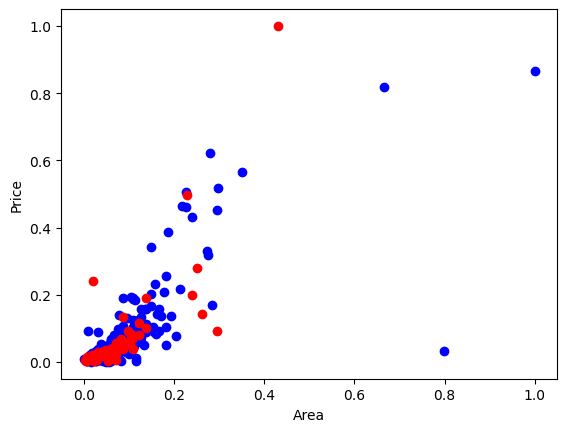

In [46]:
plt.scatter(train.Area, train.Price,  color='blue')
plt.scatter(test.Area, test.Price,  color='red')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [62]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Area','Room','Elevator','Address','Parking']])
y = np.asanyarray(train[['Price']])
regr.fit(x,y)
print("Coefficients:",regr.coef_)
print("intercept:",regr.intercept_)

Coefficients: [[ 0.92421923 -0.02218118  0.01496402  0.03687327 -0.00218313]]
intercept: [-0.0301217]


In [63]:
from sklearn.metrics import r2_score
y_hat = regr.predict(test[['Area','Room','Elevator','Address','Parking']])
x = np.asanyarray(test[['Area','Room','Elevator','Address','Parking']])
y = np.asanyarray(test[['Price']])

print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Residual sum of squares: 0.01
Variance score: 0.56


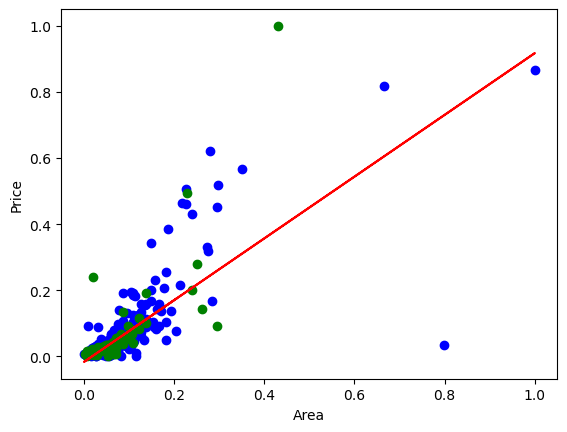

In [55]:
plt.scatter(train.Area, train.Price,  color='blue')
plt.scatter(test.Area, test.Price,  color='green')
plt.plot(train[['Area']], regr.coef_[0][0]*train[['Area']] + regr.intercept_[0], '-r')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()